### Question 1
    Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit    and make a table containing R^2 value for each prepared model.

    R&D Spend -- Research and devolop spend in the past few years
    Administration -- spend on administration in the past few years
    Marketing Spend -- spend on Marketing in the past few years
    State -- states from which data is collected
    Profit  -- profit of each state in the past few years

In [1]:
# Importing the required libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Files
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Performing EDA on the data

In [3]:
#Describe the data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
#Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# To check the null values of the data
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
print("Dimensions",df.shape)
print("Name of the Comlumns",df.columns)

Dimensions (50, 5)
Name of the Comlumns Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [7]:
# Renaming the column names
df = df.rename({'R&D Spend':'RDS','Administration':'AD','Marketing Spend':'MS'},axis=1)
df.head()

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Checking Co-relation between variables (Columns)

In [8]:
# Finding corelation between two variables
df.corr()

,RDS,AD,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Scatterplots between variables along with histogram

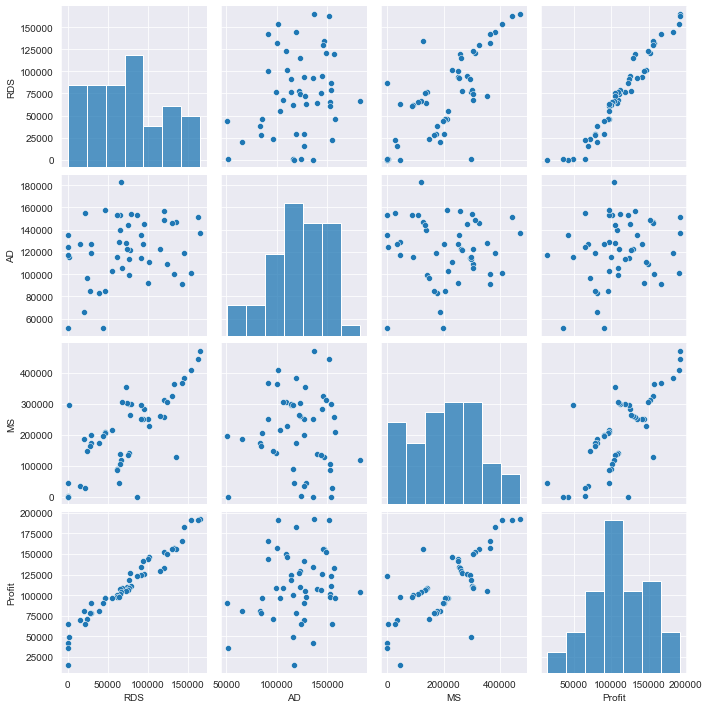

In [9]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

### Fitting the model
The Equation would be

Profit = B0 + B1(RDS) + B2(AD) + B3(MS) + e

In [10]:
model=smf.ols('Profit~RDS+AD+MS',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 12 May 2023   Prob (F-statistic):           4.53e-30
Time:                        12:13:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression Models

In [11]:
# Model fitting for the Administration independent variable
# The equation would be, Profit = B0 + B1(AD) + e
ADmodel=smf.ols('Profit~AD',data=df).fit()
print(ADmodel.pvalues)

if ADmodel.pvalues['AD'] < 0.05:
    print("\n AD is Significant variable")
else:
    print("\n AD is Insignificant variable")

Intercept    0.003824
AD           0.162217
dtype: float64

 AD is Insignificant variable


In [12]:
# Model fitting for the Marketing Spend independent variable
# The equation would be, Profit = B0 + B1(MS) + e
MSmodel=smf.ols('Profit~MS',data=df).fit()
print(MSmodel.pvalues)

if MSmodel.pvalues['MS'] < 0.05:
    print("\n MS is Significant variable")
else:
    print("\n MS is Insignificant variable")

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

 MS is Significant variable


In [13]:
# Model fitting for the Administration and Marketing Spend 
# The equation would be, Profit = B0 + B1(AD) + B2(MS) + e 
AM_m=smf.ols('Profit~AD+MS',data=df).fit()
print(AM_m.pvalues)

if all(AM_m.pvalues[['AD','MS']] < 0.05):
    print("\n Both are Significant")
elif any(AM_m.pvalues[['AD','MS']] < 0.05):
    if AM_m.pvalues['AD'] < 0.05:
        print('\n AD is a significant variable and MS is an insignificant variable.')
    else:
        print('\n MS is a significant variable and AD is an insignificant variable.')

Intercept    2.589341e-01
AD           1.729198e-02
MS           9.727245e-11
dtype: float64

 Both are Significant


### Calculating VIF (Variance Inflation Factor)

In [14]:
rsq_AD = smf.ols('AD~RDS+MS',data=df).fit().rsquared
print('\n The VIF value of the AD is',1/(1-rsq_AD))
rsq_MS = smf.ols('MS~RDS+AD',data=df).fit().rsquared
print('\n The VIF value of the MS is',1/(1-rsq_MS))


 The VIF value of the AD is 1.1750910070550453

 The VIF value of the MS is 2.3267732905308773


##### Model fitting without Marketing Spend column(independent variable)
The equation would be, 

Profit = B0 + B1(RDS) + B2(AD) + e

In [15]:
AD_m=smf.ols('Profit~RDS+AD',data=df).fit()
AD_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           7.29e-31
Time:                        12:13:18   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RDS            0.8621      0.030     28.589      0.000       0.801       0.923
AD            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model fitting without Administration column(independent variable)
The equation would be, 

Profit = B0 + B1(RDS) + B2(MS) + e

In [16]:
MS_m=smf.ols('Profit~RDS+MS',data=df).fit()
MS_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.16e-31
Time:                        12:13:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Hence, the final equation is.,

#### Profit = B0 + B1(RDS) + B2(MS) + e

### Residual Analysis

### Test for Normality of Residuals (Q-Q plot)

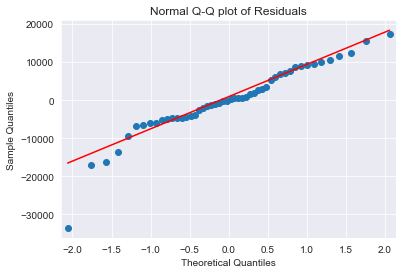

In [17]:
# QQ Plot for the Residuals
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [18]:
# Creating Function to get Standardized values of Residuals and fitted Values
def get_standardized_values ( vals):
    return(vals - vals.mean())/vals.std()

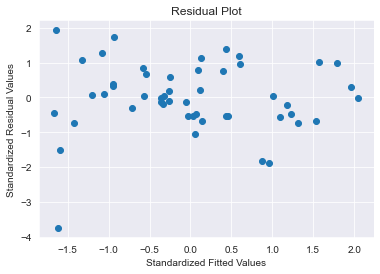

In [19]:
# Plotting the standardized values of residulas and fitted values. 
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Regressor Plot
 Residuals Vs Regressors Plot

eval_env: 1


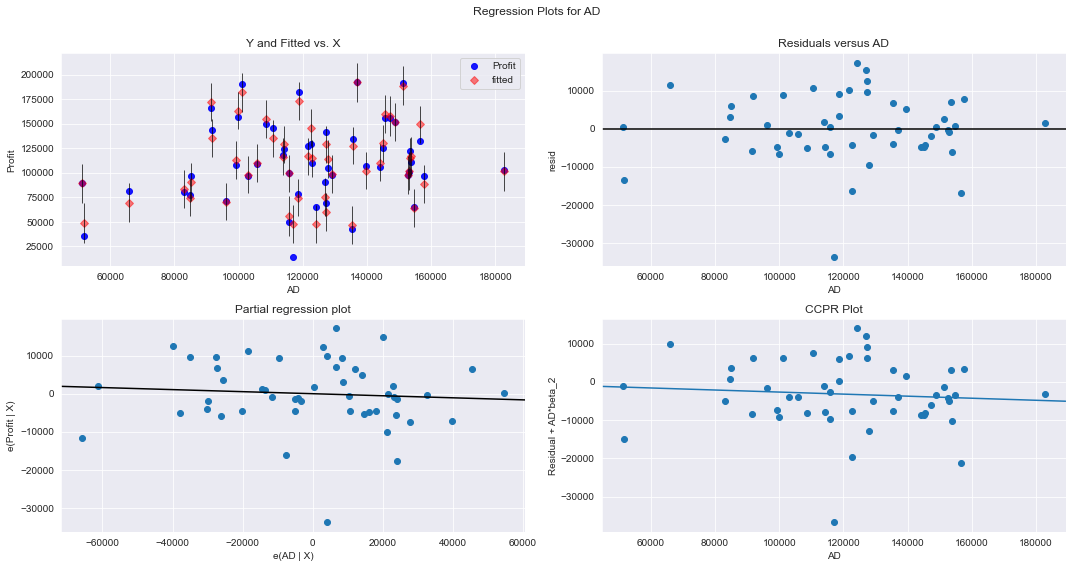

In [20]:
# Taking AD as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'AD', fig = fig)
plt.show()

eval_env: 1


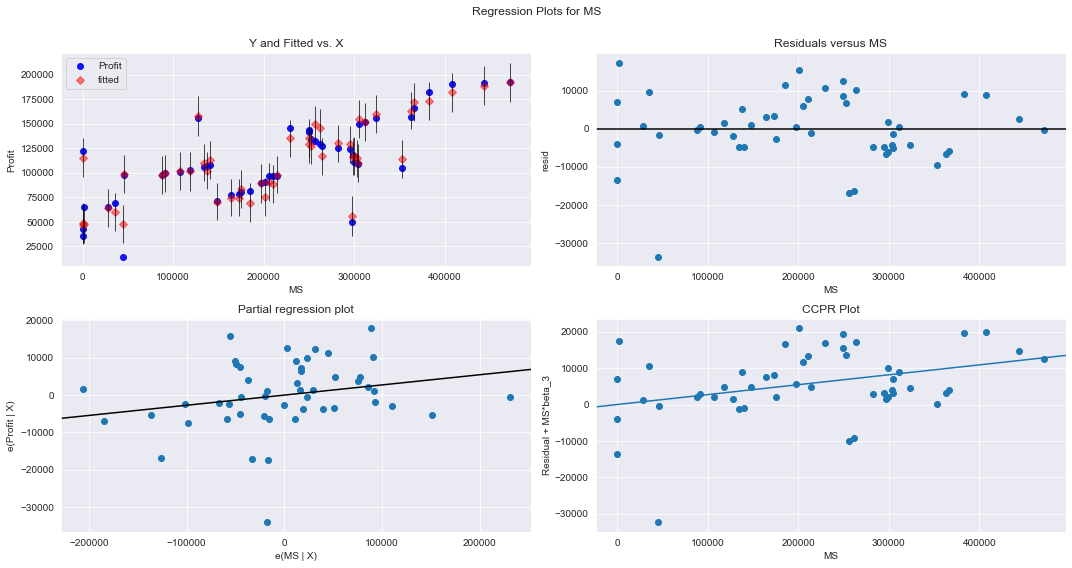

In [21]:
# Taking MS as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig = fig)
plt.show()

eval_env: 1


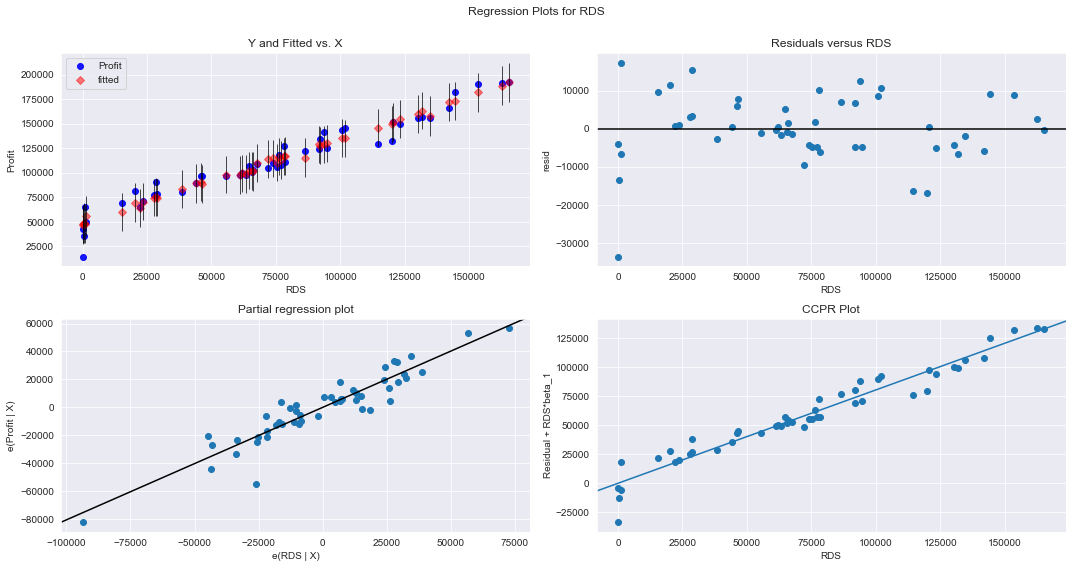

In [22]:
# Taking RDS as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'RDS', fig = fig)
plt.show()

### Model Deletion Diagnostics

#### Detecting Influencers/Outliers

#### Cook's Distance

In [23]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

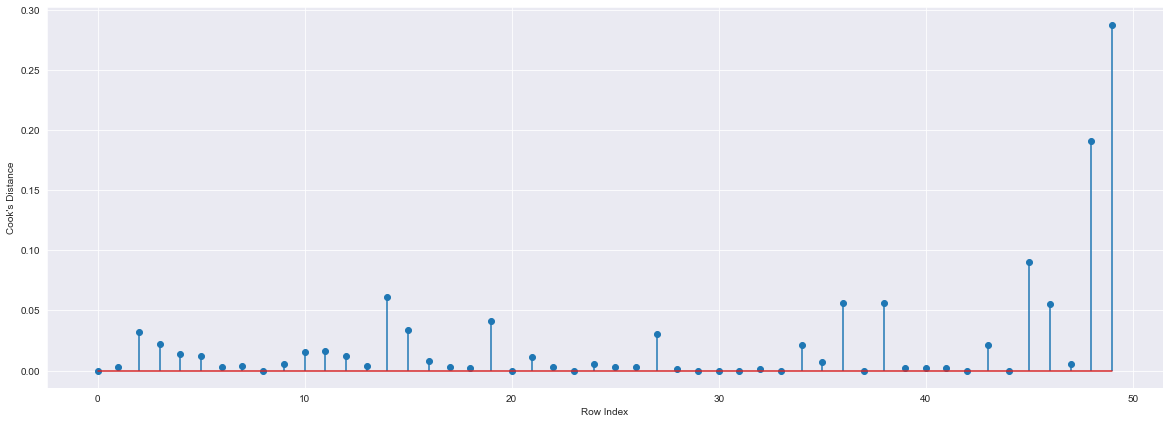

In [24]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

In [25]:
# Index and value of influencer where c is more than others.
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

#### High Influence Points

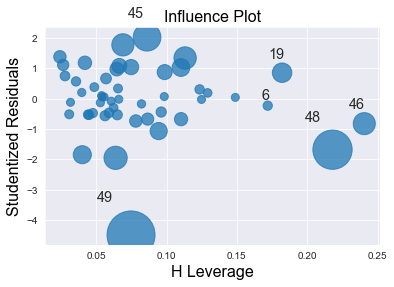

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [27]:
k = 3
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.24

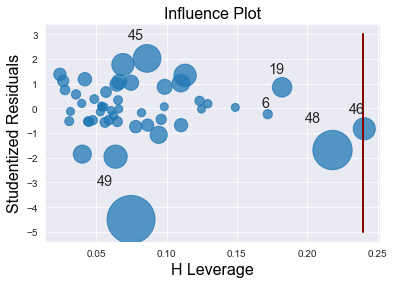

In [28]:
# To identify the outlieer beyond the leverage cutoff value
influence_plot(model)
x = [leverage_cutoff,leverage_cutoff]
y = [-5,3]
plt.plot(x,y,color = 'darkred',linewidth = 2)
plt.show()

 ##### From the above plot, it is evident that data point 46 and 49 is the influencers.

In [29]:
df[df.index.isin([46,49])]

,RDS,AD,MS,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
49,0.00,116983.80,45173.06,California,14681.40


In [30]:
# See the differences in the variable values
df.head()

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Improving the Model

In [31]:
df

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [32]:
#Discard the data points which are influencers and resign the row number(reset_index())
df1=df.drop(df.index[[46,49]],axis=0).reset_index()
df1

,index,RDS,AD,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
#Drop the original index
df1=df1.drop(['index'],axis=1)
df1

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Build Model

In [34]:
# Exclude variable "AD" and generate R-squared and AIC values
model_MS=smf.ols('Profit~RDS+MS',data=df1).fit()
print('R-squared is',model_MS.rsquared,
      '\n AIC is',model_MS.aic,
      '\n BIC is',model_MS.bic)

R-squared is 0.9603203117008039 
 AIC is 997.1027715983952 
 BIC is 1002.7163746311188


In [35]:
# Exclude variable "MS" and generate R-squared and AIC values
model_AD=smf.ols('Profit~RDS+AD',data=df1).fit()
print('R-squared is',model_AD.rsquared,
      '\n AIC is',model_AD.aic,
      '\n BIC is',model_AD.bic)

R-squared is 0.9559194683601144 
 AIC is 1002.1513539285583 
 BIC is 1007.7649569612819


#### Comparing above R-squared,Adj R-squared,AIC, BIC values, the final model without "AD" variable has high R-squared value, low AIC and BIC values.

#### Hence, consider the model with "MS" variable.

### Cook's Distance
### Model Deletion Diagnostics and Final Model

In [36]:
# Further process for identifying influencers by cook's distance method and finalizing the best model 
df2 = df1.copy()
while np.max(c)>0.5 :
    model_influence_MS = model_A.get_influence()
    (c_MS,_)=model_influence_MS.cooks_distance
    np.argmax(c_MS) , np.max(c_MS)
    
    df2=df1.drop(df1.index[[np.argmax(c_MS)]],axis=0).reset_index()
    df2=df2.dropop(['index'],axis=1)
    df2
else:
    final_model=smf.ols("Profit~RDS+MS",data=df2).fit()
    final_model.rsquared , final_model.aic
    print('R-squared is',final_model.rsquared,
      '\n AIC is',final_model.aic,
      '\n BIC is',final_model.bic)

R-squared is 0.9603203117008039 
 AIC is 997.1027715983952 
 BIC is 1002.7163746311188


## Table containing R-sq value for each prepared model 

In [37]:
val = {"Model":pd.Series(["Basic_model","without_AD(before outlier removal)","without_MS(before outlier removal)",
                          "without_AD(after outlier removal)","without_MS(after outlier removal","Final_model  (without AD)"]),
       "RSquare":pd.Series([model.rsquared,MS_m.rsquared,
                             AD_m.rsquared,model_MS.rsquared,
                             model_AD.rsquared,final_model.rsquared]),
       "Adj RSquare":pd.Series([model.rsquared_adj,MS_m.rsquared_adj,
                             AD_m.rsquared_adj,model_MS.rsquared_adj,
                             model_AD.rsquared_adj,final_model.rsquared_adj]),
       "AIC":pd.Series([model.aic,MS_m.aic,AD_m.aic,model_MS.aic,model_AD.aic,final_model.aic])}

table = pd.DataFrame(val)
table

,Model,RSquare,Adj RSquare,AIC
0,Basic_model,0.950746,0.947534,1058.771499
1,without_AD(before outlier removal),0.950450,0.948342,1057.070772
2,without_MS(before outlier removal),0.947813,0.945592,1059.663693
3,without_AD(after outlier removal),0.960320,0.958557,997.102772
4,without_MS(after outlier removal,0.955919,0.953960,1002.151354
5,Final_model (without AD),0.960320,0.958557,997.102772


In [38]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.94e-32
Time:                        12:13:22   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
RDS            0.7512      0.039     19.431      0.000       0.673       0.829
MS             0.0353      0.014      2.511      0.016       0.007       0.064
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction

The following is the data with actual and predicted values of the dependent variable(Profit)

In [39]:
df['Predicted Profit'] = final_model.predict(df)
df[['Profit','Predicted Profit']]

,Profit,Predicted Profit
0,192261.83,191028.251047
1,191792.06,187977.734719
2,191050.39,179830.836647
3,182901.99,172145.393688
4,166187.94,169843.118321
5,156991.12,162040.951129
6,156122.51,155805.138799
7,155752.60,159479.992453
8,152211.77,151718.663406
9,149759.96,153582.513356


### Prediction for new data

In [40]:
new_data = pd.DataFrame({'RDS' : 101010.0,
                         'AD' : 202101.10,
                         'MS' : 1002.05}, index=[1])
new_data

,RDS,AD,MS
1,101010.0,202101.1,1002.05


In [41]:
# Predicted profit for the new data
final_model.predict(new_data)

1    126090.310052
dtype: float64